# 绘制三维矢量场的一种方法

矢量场：


(N.x/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.i + (N.y/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.j + (N.z/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.k

矢量场的散度 (∇·A):


0

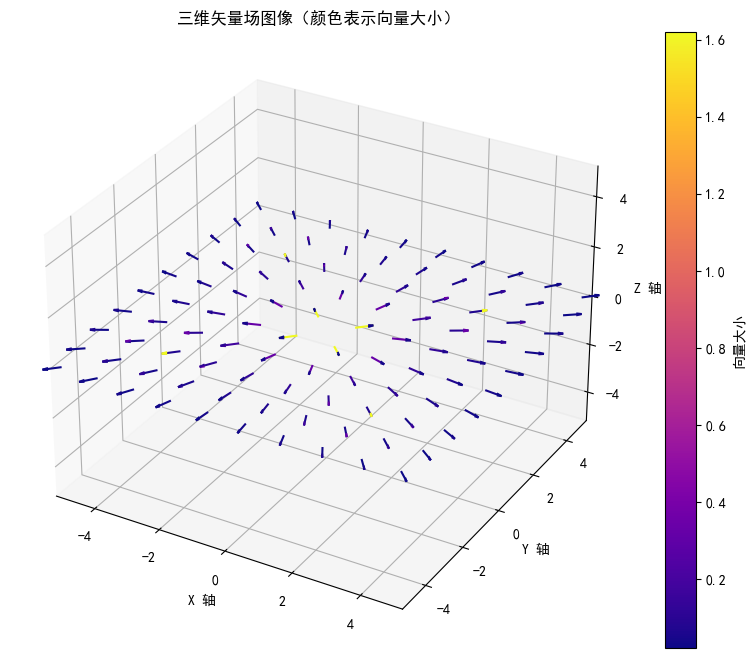

In [ ]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = (N.x * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt(N.x**2 + N.y**2 + N.z**2)) ** 3)
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    div_A = divergence(A)
    div_A = sp.simplify(div_A)
    print("矢量场的散度 (∇·A):")
    display(div_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(0, 0, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.show()